In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
ltint = pd.read_csv('data\ltint_monthly.csv')
stint = pd.read_csv('data\stint_monthly.csv')
#cpi =pd.read_csv('data\cpi.csv')
cpi =pd.read_csv('data\cpi_2015.csv')
shares = pd.read_csv('data\share_prices.csv')

In [3]:
ltint

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,LTINT,TOT,PC_PA,M,1969-07,5.8000,NaN
1,AUS,LTINT,TOT,PC_PA,M,1969-08,5.7900,NaN
2,AUS,LTINT,TOT,PC_PA,M,1969-09,5.8100,NaN
3,AUS,LTINT,TOT,PC_PA,M,1969-10,5.8300,NaN
4,AUS,LTINT,TOT,PC_PA,M,1969-11,5.8500,NaN
...,...,...,...,...,...,...,...,...
3849,EA19,LTINT,TOT,PC_PA,M,2020-12,-0.0915,NaN
3850,EA19,LTINT,TOT,PC_PA,M,2021-01,-0.0636,NaN
3851,EA19,LTINT,TOT,PC_PA,M,2021-02,0.0644,NaN
3852,EA19,LTINT,TOT,PC_PA,M,2021-03,0.1478,NaN


In [4]:
ltint.LOCATION.unique()

array(['AUS', 'CAN', 'USA', 'GBR', 'JPN', 'EA19'], dtype=object)

In [5]:
wanted = set(['CAN', 'USA', 'GBR'])

In [6]:
wanted

{'CAN', 'GBR', 'USA'}

In [7]:
ltint

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,LTINT,TOT,PC_PA,M,1969-07,5.8000,NaN
1,AUS,LTINT,TOT,PC_PA,M,1969-08,5.7900,NaN
2,AUS,LTINT,TOT,PC_PA,M,1969-09,5.8100,NaN
3,AUS,LTINT,TOT,PC_PA,M,1969-10,5.8300,NaN
4,AUS,LTINT,TOT,PC_PA,M,1969-11,5.8500,NaN
...,...,...,...,...,...,...,...,...
3849,EA19,LTINT,TOT,PC_PA,M,2020-12,-0.0915,NaN
3850,EA19,LTINT,TOT,PC_PA,M,2021-01,-0.0636,NaN
3851,EA19,LTINT,TOT,PC_PA,M,2021-02,0.0644,NaN
3852,EA19,LTINT,TOT,PC_PA,M,2021-03,0.1478,NaN


* We only need the columns for location, time and value
* Value needs to be changed to indicate long term interst rate

In [8]:
ltint = ltint[['LOCATION', 'TIME', 'Value']]
ltint = ltint.rename(columns={"Value": "lt_int"})

* This works

In [9]:
stint

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,CHL,STINT,TOT,PC_PA,M,1997-07,12.54,NaN
1,CHL,STINT,TOT,PC_PA,M,1997-08,13.77,NaN
2,CHL,STINT,TOT,PC_PA,M,1997-09,13.47,NaN
3,CHL,STINT,TOT,PC_PA,M,1997-10,14.82,NaN
4,CHL,STINT,TOT,PC_PA,M,1997-11,13.04,NaN
...,...,...,...,...,...,...,...,...
17396,IND,STINT,TOT,PC_PA,M,2020-11,3.06,NaN
17397,IND,STINT,TOT,PC_PA,M,2020-12,3.10,NaN
17398,IND,STINT,TOT,PC_PA,M,2021-01,3.21,NaN
17399,IND,STINT,TOT,PC_PA,M,2021-02,3.26,NaN


In [10]:
stint.LOCATION.unique()


array(['CHL', 'USA', 'NZL', 'DNK', 'ISR', 'GBR', 'BEL', 'RUS', 'IDN',
       'HUN', 'FIN', 'LUX', 'ESP', 'NOR', 'JPN', 'GRC', 'KOR', 'AUT',
       'SVK', 'EST', 'SVN', 'CAN', 'DEU', 'PRT', 'ISL', 'AUS', 'IRL',
       'NLD', 'CHE', 'ZAF', 'CZE', 'POL', 'CHN', 'SWE', 'MEX', 'FRA',
       'ITA', 'COL', 'LVA', 'EA19', 'LTU', 'CRI', 'IND'], dtype=object)

In [11]:
stint = stint[['LOCATION', 'TIME', 'Value']]
stint =stint.rename(columns={"Value": "st_int"})

* We'll do the same thing to this df

In [12]:
cpi =cpi[['LOCATION', 'TIME', 'Value']]
cpi =cpi.rename(columns={"Value": "cpi_ag"})

* We only need the data for the US, Canada and Great Britain

In [13]:
shares = shares[['LOCATION', 'TIME', 'Value']]
shares =shares.rename(columns={"Value": "share_pr"})

In [14]:
cpi.describe()

,cpi_ag
count,2187.000000
mean,55.290661
std,32.769833
min,5.637529
25%,21.302135
50%,58.309190
75%,83.288135
max,111.754400


In [15]:
ltint.LOCATION.unique()

array(['AUS', 'CAN', 'USA', 'GBR', 'JPN', 'EA19'], dtype=object)

In [16]:
def country(cont_name):
    st = stint[stint['LOCATION'] == cont_name]
    lt = ltint[ltint['LOCATION'] == cont_name]
    inf = cpi[cpi['LOCATION'] == cont_name]
    s_p = shares[shares['LOCATION'] == cont_name]
    rates = pd.merge(st, lt, how='inner', on=['TIME', 'LOCATION'])
    rates = pd.merge(rates, inf, how='inner', on=['TIME', 'LOCATION'])
    rates = pd.merge(rates, s_p, how='inner', on=['TIME', 'LOCATION'])
    rates['TIME'] = pd.to_datetime(rates['TIME'])
    return rates

In [17]:
df_can = country('CAN')
df_usa = country('USA')
df_gbr = country('GBR')

In [18]:
df_usa

,LOCATION,TIME,st_int,lt_int,cpi_ag,share_pr
0,USA,1964-06-01,3.86,4.17,13.07923,4.262905
1,USA,1964-07-01,3.87,4.19,13.12142,4.415434
2,USA,1964-08-01,3.85,4.19,13.07923,4.367893
3,USA,1964-09-01,3.87,4.20,13.12142,4.448119
4,USA,1964-10-01,3.94,4.19,13.12142,4.532308
...,...,...,...,...,...,...
676,USA,2020-11-01,0.16,0.87,109.79340,128.248000
677,USA,2020-12-01,0.17,0.93,109.89680,134.594100
678,USA,2021-01-01,0.14,1.08,110.36420,138.835700
679,USA,2021-02-01,0.11,1.26,110.96840,142.342900


In [55]:
cpi_roll = df_usa['cpi_ag'].rolling(window=36, center=False).mean()

<AxesSubplot:xlabel='TIME', ylabel='cpi_ag'>

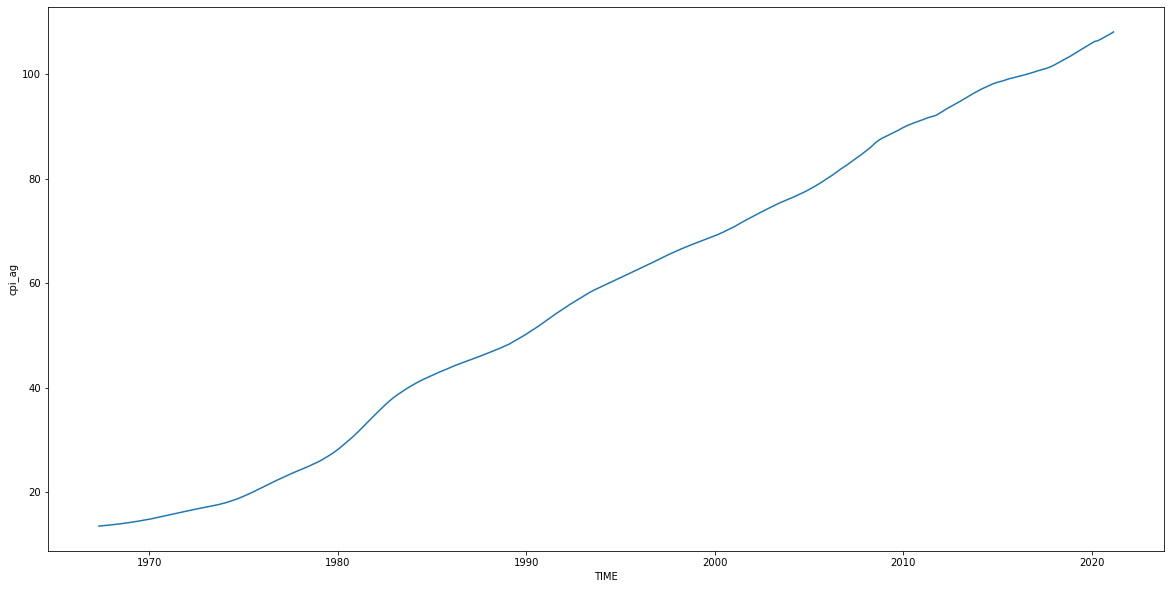

In [56]:
sns.lineplot( x=df_usa['TIME'], y=cpi_roll)

In [19]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 680
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   LOCATION  681 non-null    object        
 1   TIME      681 non-null    datetime64[ns]
 2   st_int    681 non-null    float64       
 3   lt_int    681 non-null    float64       
 4   cpi_ag    681 non-null    float64       
 5   share_pr  681 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 37.2+ KB


<AxesSubplot:xlabel='TIME', ylabel='st_int'>

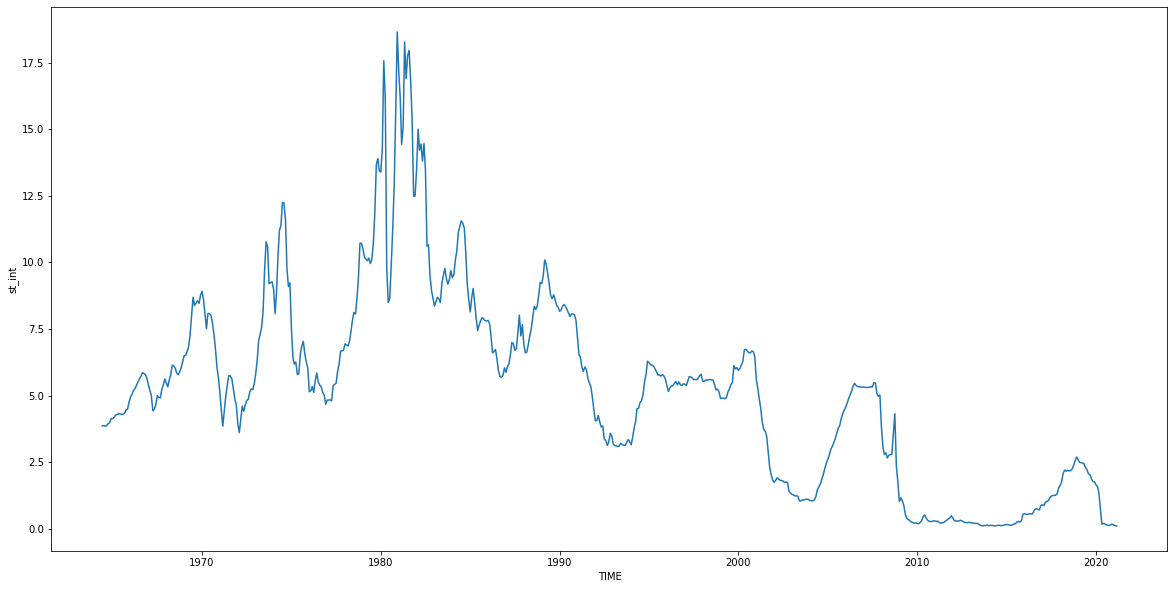

In [20]:
sns.lineplot(data=df_usa, x='TIME', y='st_int')

In [21]:
def quick_plot(df):

    for metric in df[['st_int', 'lt_int']]:
        sns.lineplot(data=df, x='TIME', y=metric)
    

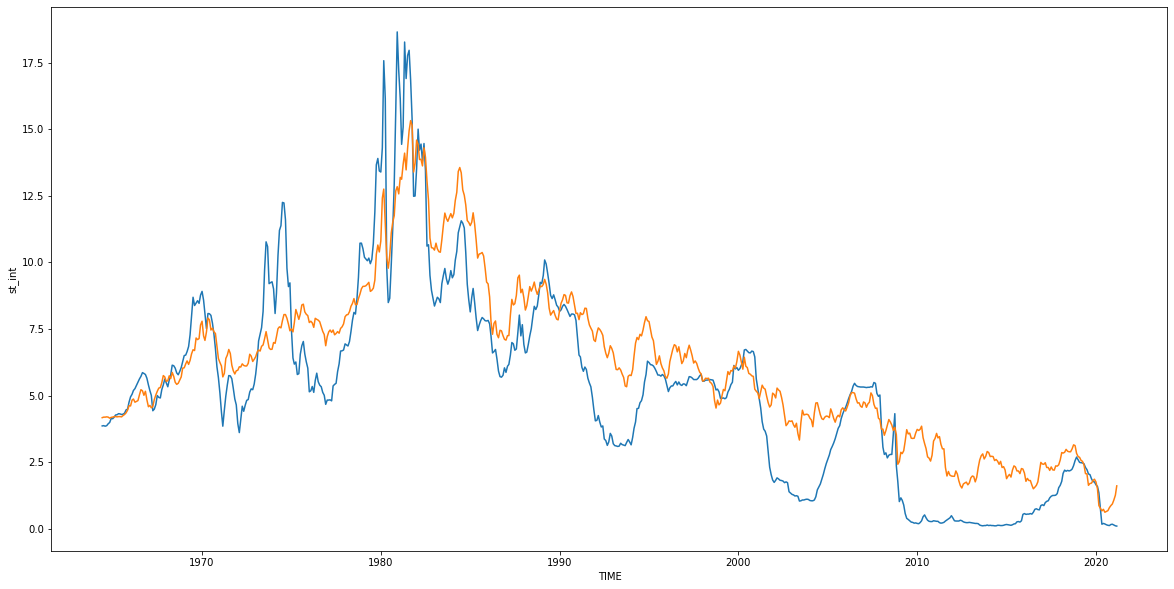

In [22]:
quick_plot(df_usa)

In [23]:
df_gbr

,LOCATION,TIME,st_int,lt_int,cpi_ag,share_pr
0,GBR,1986-01-01,12.86300,11.1300,43.67648,21.25789
1,GBR,1986-02-01,12.71875,10.7300,43.85808,22.47751
2,GBR,1986-03-01,11.77679,9.6900,43.90348,24.54353
3,GBR,1986-04-01,10.57670,8.9400,44.35750,25.31778
4,GBR,1986-05-01,10.26705,9.1500,44.40290,24.35308
...,...,...,...,...,...,...
418,GBR,2020-11-01,0.04000,0.3836,109.10000,94.35523
419,GBR,2020-12-01,0.03000,0.3224,109.40000,98.82664
420,GBR,2021-01-01,0.03000,0.3672,109.30000,101.40090
421,GBR,2021-02-01,0.05000,0.6222,109.40000,99.82986


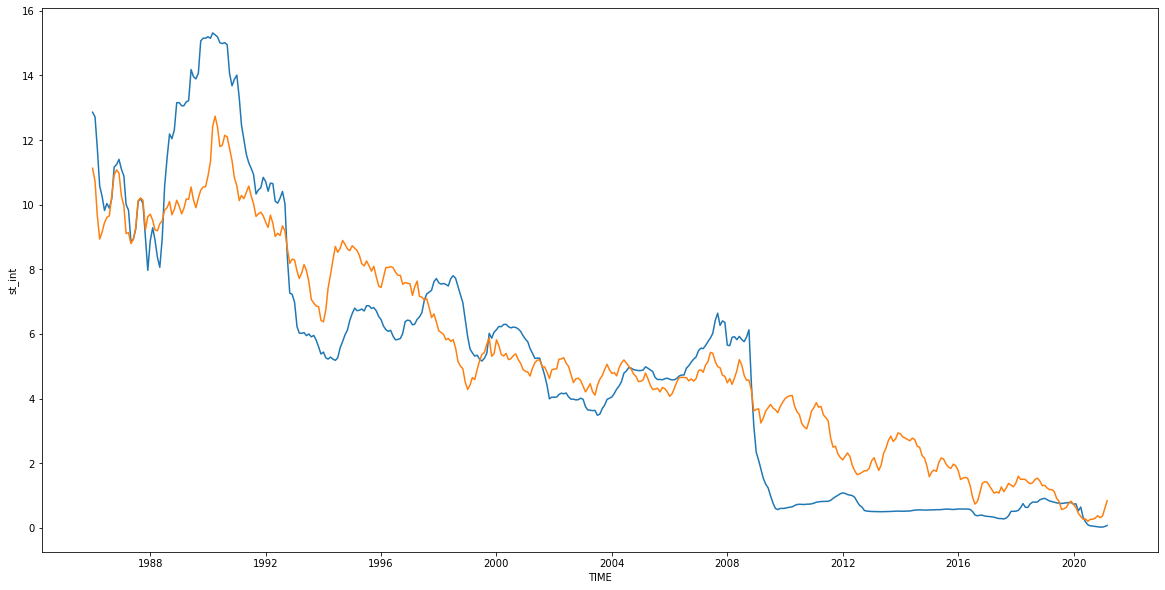

In [24]:
quick_plot(df_gbr)

In [37]:
df_usa['st_adj'] = df_usa['st_int']/df_usa['cpi_ag'] * 100
df_usa['lt_adj'] = df_usa['lt_int']/df_usa['cpi_ag'] * 100
df_usa['int_gap'] = df_usa['lt_int'] - df_usa['st_int']
df_usa['gap_adj'] = df_usa['int_gap']/df_usa['cpi_ag'] * 100

In [38]:
df_usa

,LOCATION,TIME,st_int,lt_int,cpi_ag,share_pr,st_adj,lt_adj,int_gap,gap_adj,delta_share
0,USA,1964-06-01,3.86,4.17,13.07923,4.262905,29.512441,31.882611,0.31,2.370170,NaN
1,USA,1964-07-01,3.87,4.19,13.12142,4.415434,29.493759,31.932519,0.32,2.438760,NaN
2,USA,1964-08-01,3.85,4.19,13.07923,4.367893,29.435984,32.035525,0.34,2.599541,NaN
3,USA,1964-09-01,3.87,4.20,13.12142,4.448119,29.493759,32.008731,0.33,2.514972,NaN
4,USA,1964-10-01,3.94,4.19,13.12142,4.532308,30.027238,31.932519,0.25,1.905282,0.269403
...,...,...,...,...,...,...,...,...,...,...,...
676,USA,2020-11-01,0.16,0.87,109.79340,128.248000,0.145728,0.792397,0.71,0.646669,13.153700
677,USA,2020-12-01,0.17,0.93,109.89680,134.594100,0.154691,0.846248,0.76,0.691558,13.956100
678,USA,2021-01-01,0.14,1.08,110.36420,138.835700,0.126853,0.978578,0.94,0.851725,19.090100
679,USA,2021-02-01,0.11,1.26,110.96840,142.342900,0.099127,1.135458,1.15,1.036331,20.871800


<AxesSubplot:xlabel='TIME', ylabel='st_adj'>

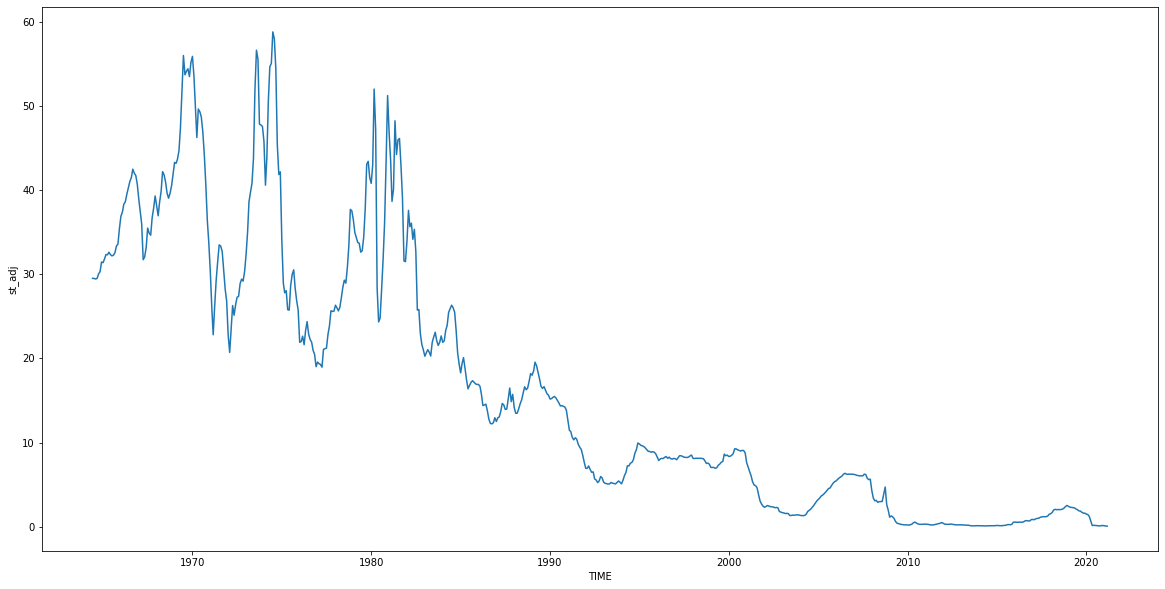

In [39]:
sns.lineplot(data=df_usa,
         x='TIME', y='st_adj')


(-2.0, 15.0)

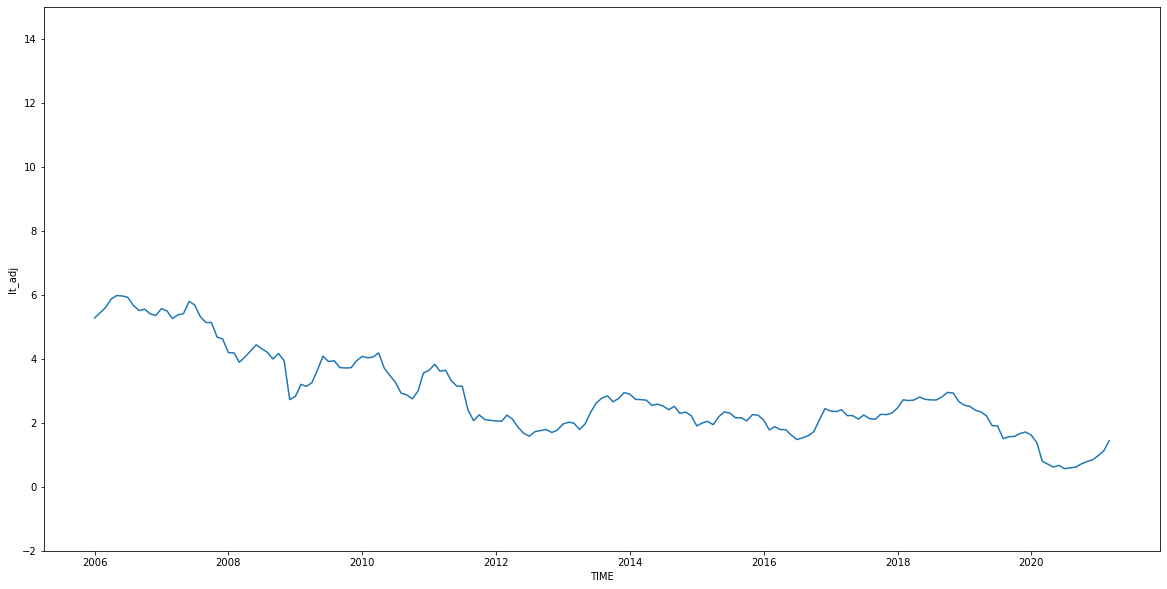

In [40]:
sns.lineplot(data=df_usa.loc[df_usa['TIME'] >= '2006-01-01'],
         x='TIME', y='lt_adj')
plt.ylim(-2, 15)

In [41]:
df_2008 =df_usa.loc[(df_usa['TIME'] >= '2008-06-01') & (
            df_usa['TIME'] < '2010-04-01')]
df_2008

,LOCATION,TIME,st_int,lt_int,cpi_ag,share_pr,st_adj,lt_adj,int_gap,gap_adj,delta_share
528,USA,2008-06-01,2.76,4.10,92.32038,84.26327,2.989589,4.441056,1.34,1.451467,-0.38568
529,USA,2008-07-01,2.79,4.01,92.80516,78.95065,3.006298,4.320880,1.22,1.314582,-3.21881
530,USA,2008-08-01,2.79,3.89,92.43472,78.31818,3.018346,4.208375,1.10,1.190029,-7.60404
531,USA,2008-09-01,3.59,3.69,92.30688,74.07194,3.889201,3.997535,0.10,0.108334,-14.18975
532,USA,2008-10-01,4.32,3.81,91.37446,57.41563,4.727798,4.169655,-0.51,-0.558143,-26.84764
533,USA,2008-11-01,2.36,3.53,89.62437,51.77961,2.633212,3.938661,1.17,1.305449,-27.17104
534,USA,2008-12-01,1.77,2.42,88.69743,51.73662,1.995548,2.728377,0.65,0.732828,-26.58156
535,USA,2009-01-01,1.02,2.52,89.08348,51.37847,1.144993,2.828807,1.50,1.683814,-22.69347
536,USA,2009-02-01,1.16,2.87,89.52649,47.38305,1.295706,3.205755,1.71,1.910049,-10.03258
537,USA,2009-03-01,1.07,2.82,89.74419,44.39098,1.192278,3.142265,1.75,1.949987,-7.38863


In [42]:
df_1516 = df_usa.loc[(df_usa['TIME'] >= '2015-01-01') & (
            df_usa['TIME'] < '2016-04-01')]
df_1516

,LOCATION,TIME,st_int,lt_int,cpi_ag,share_pr,st_adj,lt_adj,int_gap,gap_adj,delta_share
607,USA,2015-01-01,0.16,1.88,98.60348,100.07910,0.162266,1.906626,1.72,1.744360,-2.30880
608,USA,2015-02-01,0.15,1.98,99.03172,102.77560,0.151467,1.999359,1.83,1.847893,4.70349
609,USA,2015-03-01,0.14,2.04,99.62112,102.25370,0.140532,2.047759,1.90,1.907226,-0.00650
610,USA,2015-04-01,0.13,1.94,99.82364,103.84880,0.130230,1.943427,1.81,1.813198,2.47230
611,USA,2015-05-01,0.15,2.20,100.33250,104.40680,0.149503,2.192709,2.05,2.043206,4.32770
612,USA,2015-06-01,0.18,2.36,100.68390,103.16320,0.178777,2.343970,2.18,2.165192,0.38760
613,USA,2015-07-01,0.19,2.32,100.69070,101.69380,0.188697,2.304086,2.13,2.115389,-0.55990
614,USA,2015-08-01,0.26,2.17,100.54810,98.64014,0.258583,2.158171,1.91,1.899588,-5.20866
615,USA,2015-09-01,0.27,2.17,100.39150,93.22412,0.268947,2.161538,1.90,1.892591,-11.18268
616,USA,2015-10-01,0.25,2.07,100.34640,96.70031,0.249137,2.062854,1.82,1.813717,-6.46289


(-2.0, 10.0)

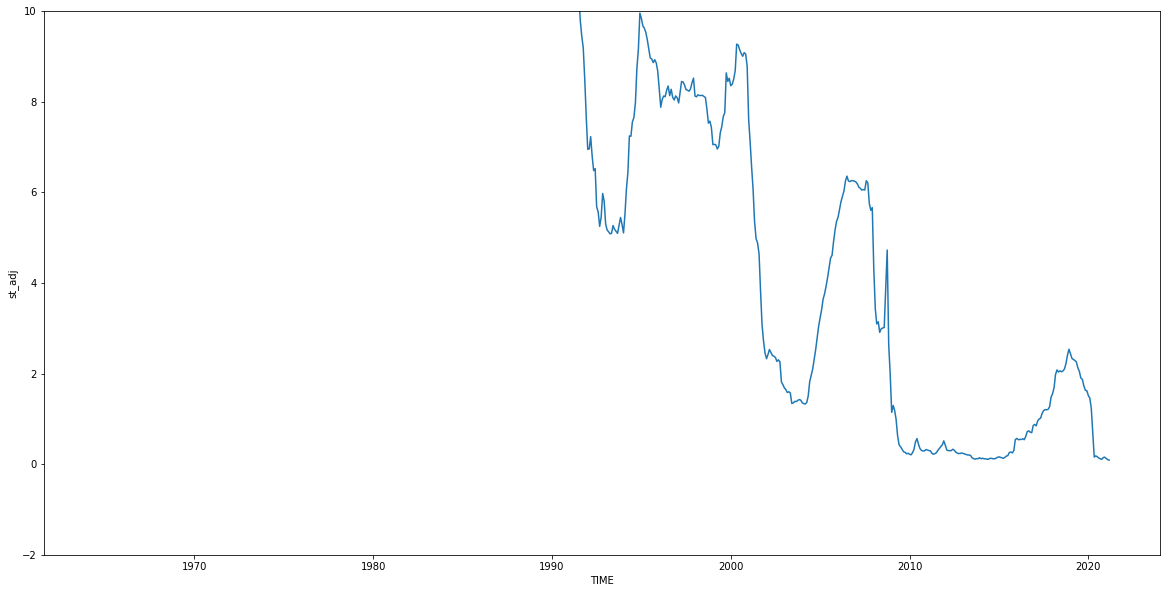

In [43]:
sns.lineplot(data=df_usa, x='TIME', y='st_adj')
plt.ylim(-2, 10)

(-1.0, 12.0)

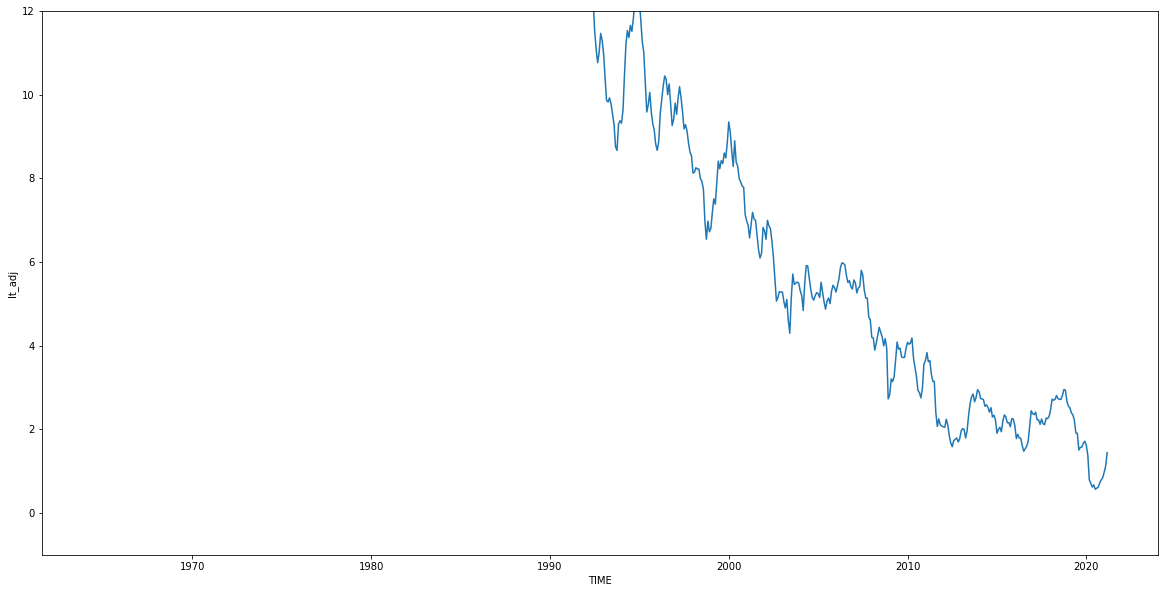

In [44]:
sns.lineplot(data=df_usa,
         x='TIME', y='lt_adj')

plt.ylim(-1, 12)

(-1.0, 5.0)

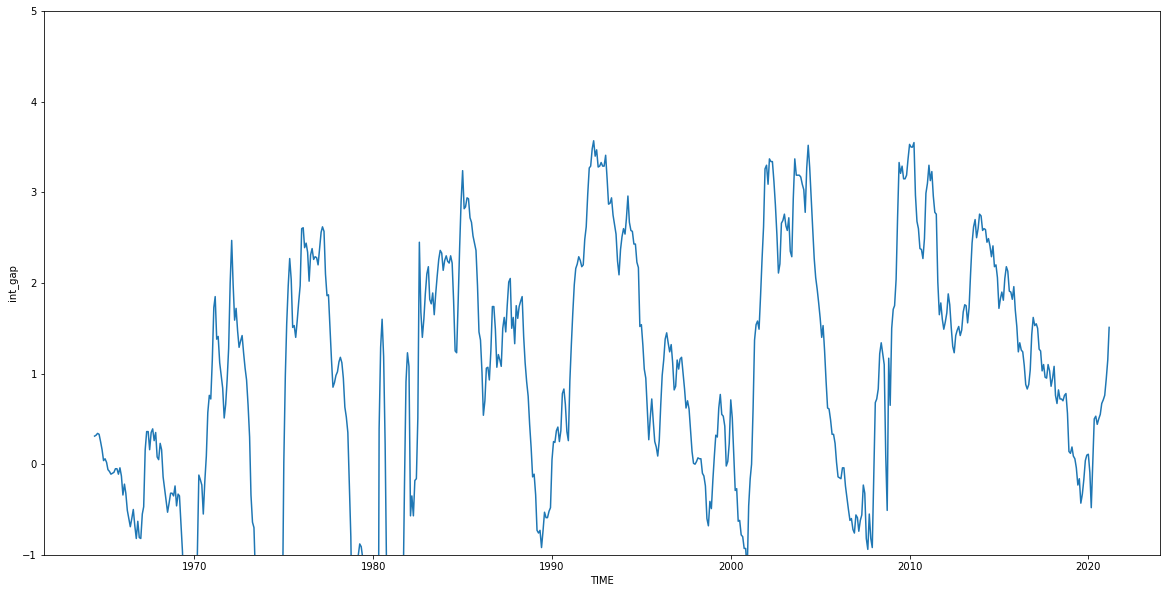

In [45]:
sns.lineplot(data=df_usa, x='TIME', y='int_gap')
plt.ylim(-1, 5)

<AxesSubplot:xlabel='TIME', ylabel='share_pr'>

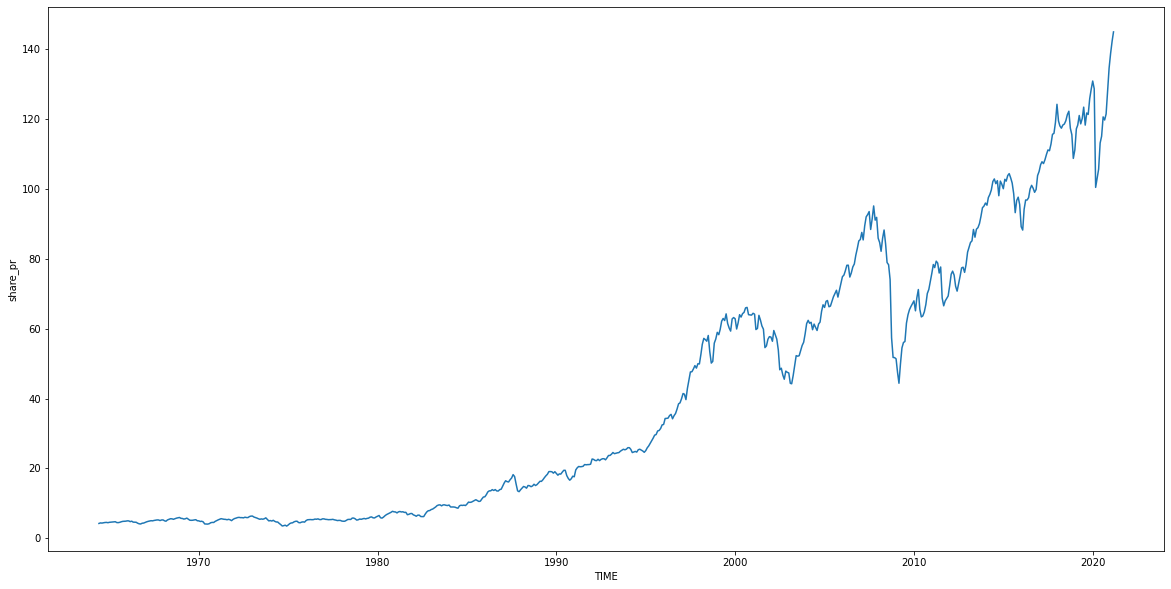

In [46]:
sns.lineplot(data=df_usa, x='TIME', y='share_pr')

In [47]:
df_usa['delta_share'] =df_usa['share_pr'].diff(4)

<AxesSubplot:xlabel='TIME', ylabel='delta_share'>

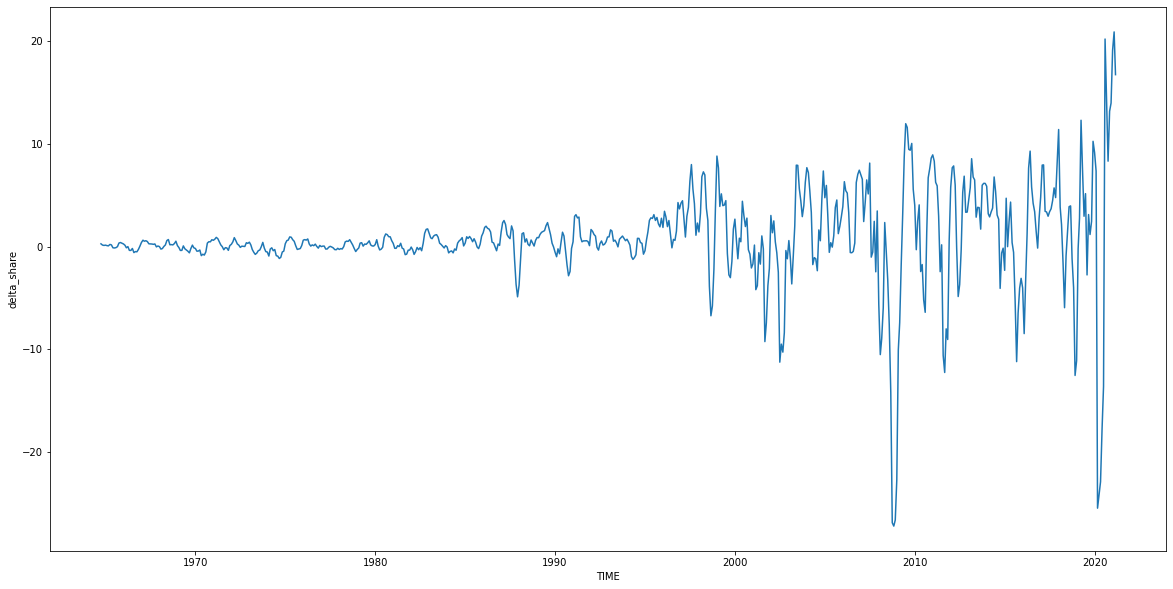

In [48]:
sns.lineplot(data=df_usa, x='TIME', y='delta_share')

random walk, arma, ltsm